In [1]:
import pandas as pd

df = pd.read_csv('Heart_Failure_Prediction_Dataset.csv')

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.drop('HeartDisease',axis=1, inplace=True)

df.loc[df['Sex']=='M','Sex']=1
df.loc[df['Sex']=='F','Sex']=0
df['Sex'] = df['Sex'].astype('int')

df = pd.get_dummies(df)

In [4]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x_axis = []
y_inertia = []
y_silhouette_score = []
for k in range(2, 31):
    x_axis.append(k)
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(df)
    silhouette = silhouette_score(df, kmeans.labels_)
    print(k, kmeans.inertia_, silhouette)
    y_inertia.append(kmeans.inertia_)
    y_silhouette_score.append(silhouette)

2 3492027.211813186 0.6942655178350269
3 2055095.0562552724 0.4653527518712659
4 1596700.201514128 0.4448143210563549
5 1341506.447863091 0.35968854026890773
6 1172553.0951552447 0.36223239751447006
7 1055068.8234684428 0.35442458796051773
8 971257.2039590544 0.3494750463142158
9 887656.0887250336 0.34673301400479045
10 821949.976595293 0.2621033647073837
11 783815.5841806597 0.2561993510368711
12 749495.0699520375 0.23702712200516982
13 715732.0685162459 0.23543379239489684
14 683269.3211792867 0.23028823995667236
15 646777.2653384322 0.23704985317055371
16 618987.9963647567 0.24132160763856297
17 599252.3505362472 0.2353236645003652
18 571101.9810549363 0.23832136620385175
19 551945.0931539183 0.2348614104262452
20 531905.0400739791 0.22959597054014524
21 519368.7845426807 0.23301283921540988
22 503927.82705392584 0.23943051652168015
23 487787.4857169048 0.22645614804433498
24 472109.70483829704 0.23277463686954333
25 452266.58278305957 0.24289910563229847
26 453717.8893468889 0.2400

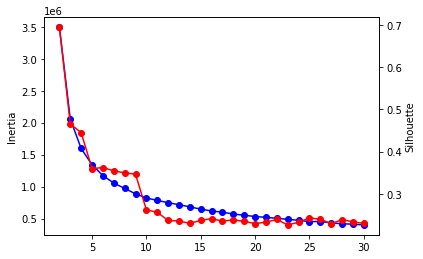

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(x_axis, y_inertia, marker='o', color='blue')
ax1.set_ylabel('Inertia')
ax2 = ax1.twinx()
ax2.plot(x_axis, y_silhouette_score, marker='o', color='red')
ax2.set_ylabel('Silhouette')
plt.show()

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(df)

In [8]:
add_combine = []
keys = df.keys().values

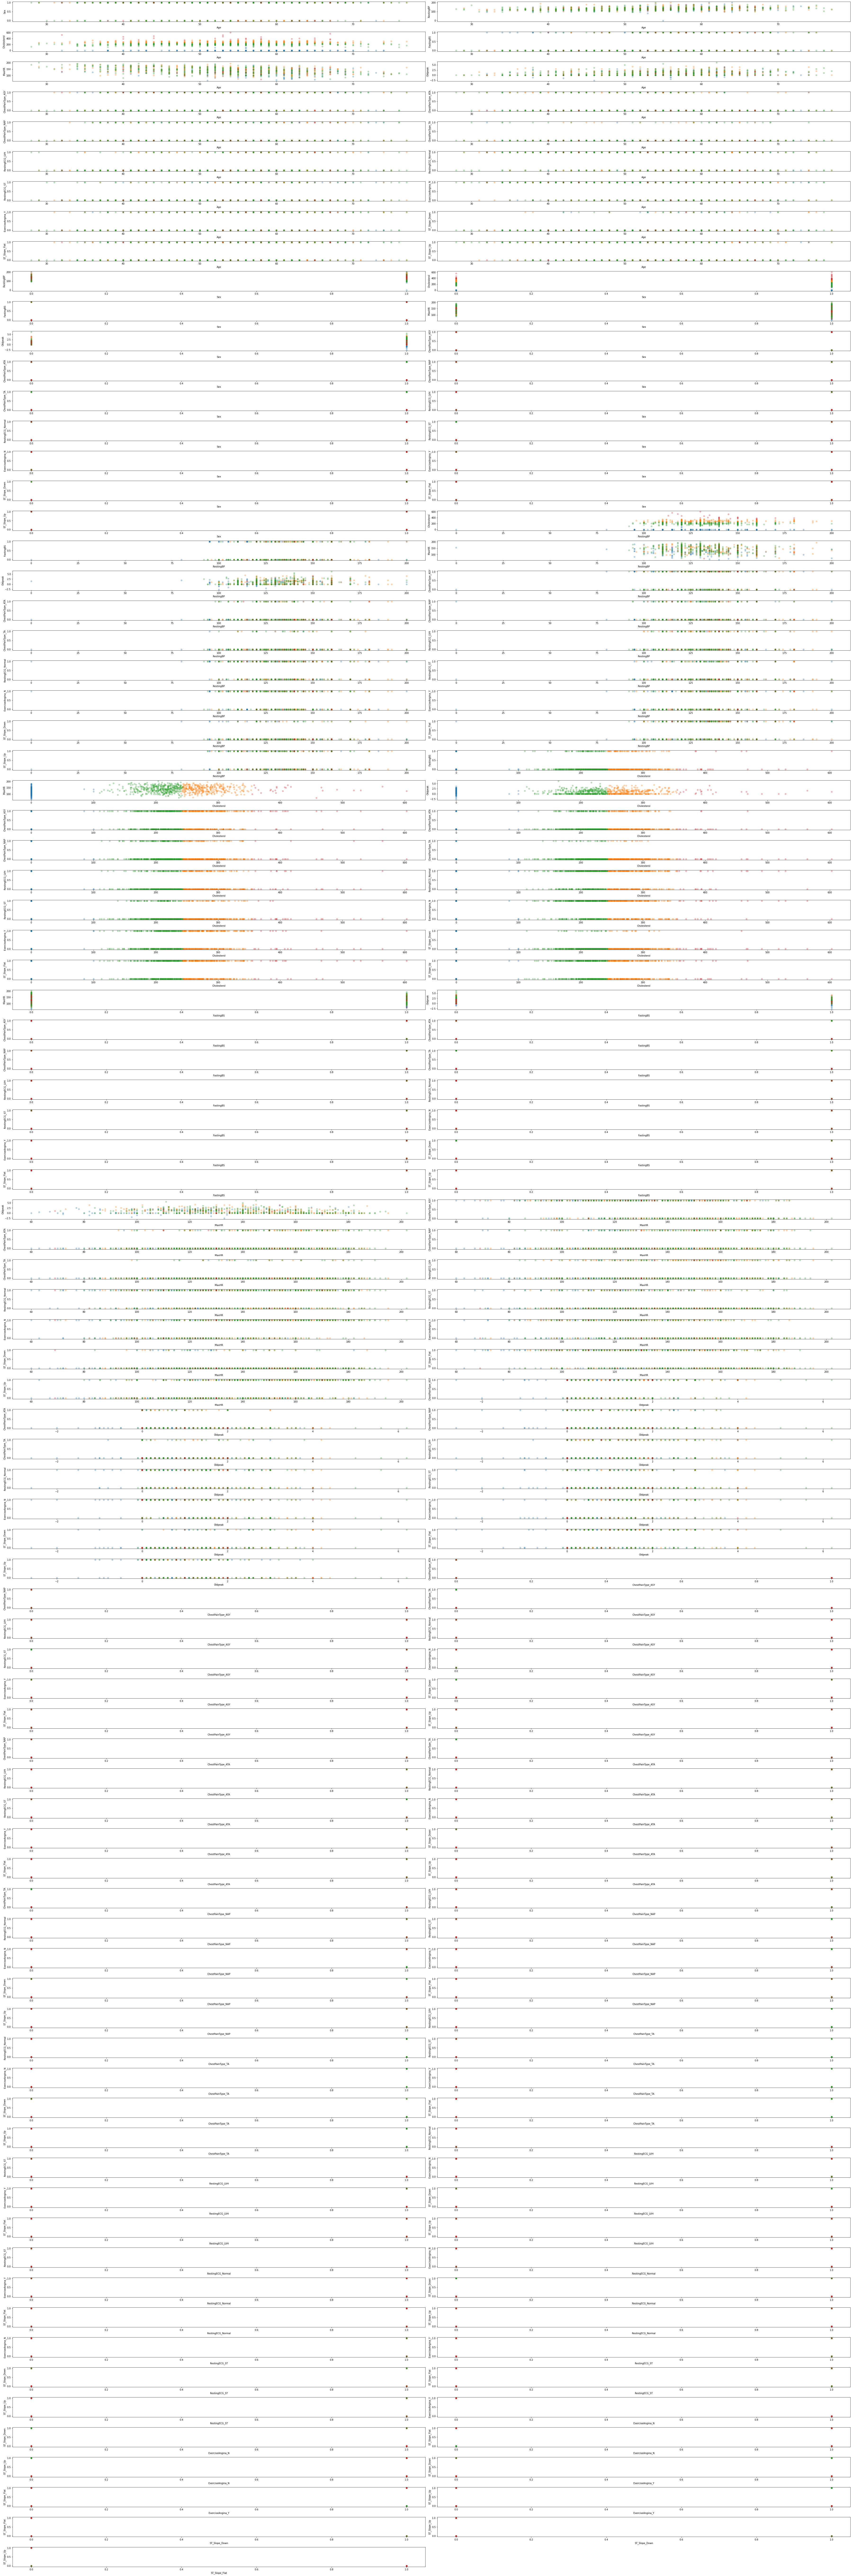

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

total = len(keys)*(len(keys)-1)
col = 2
row = int(total/2+0.5)
idx = 1

fig = plt.figure(figsize=(50,300))
for x_value_key in keys:
    for y_value_key in keys:
        if x_value_key == y_value_key:
            continue
        elif (x_value_key,y_value_key) in add_combine or (y_value_key,x_value_key) in add_combine:
            continue
        
        ax = fig.add_subplot(row,col,idx)
        
        for k in range(4):
            ax.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
        ax.set_xlabel(x_value_key)
        ax.set_ylabel(y_value_key)
        add_combine.append((x_value_key,y_value_key))
        add_combine.append((y_value_key,x_value_key))
        idx += 1
plt.tight_layout()
plt.show()

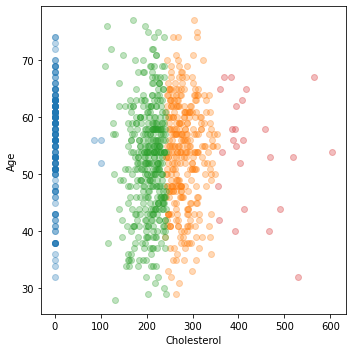

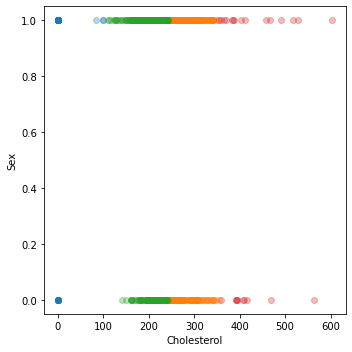

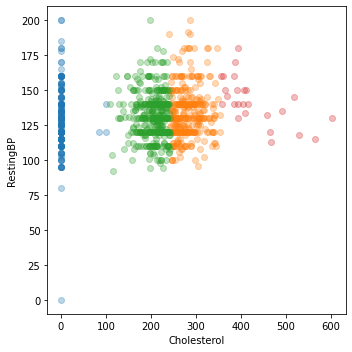

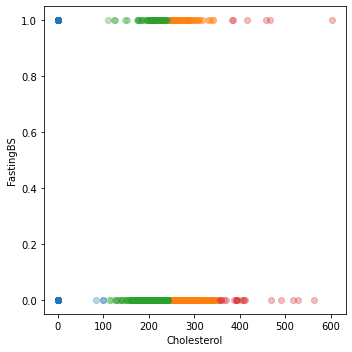

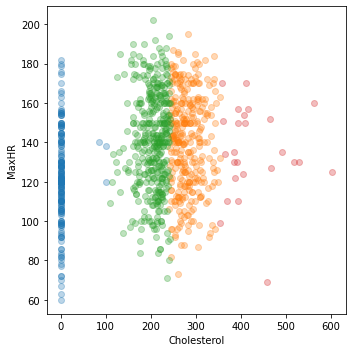

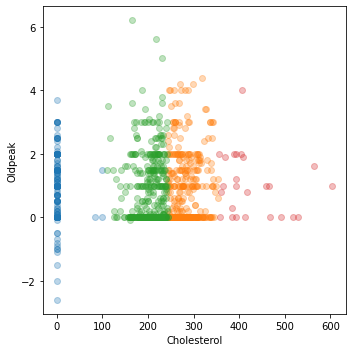

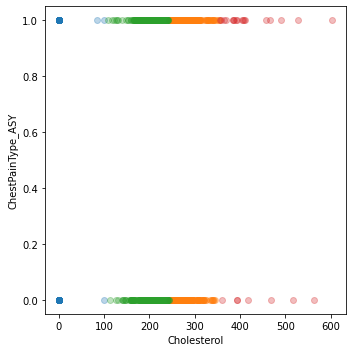

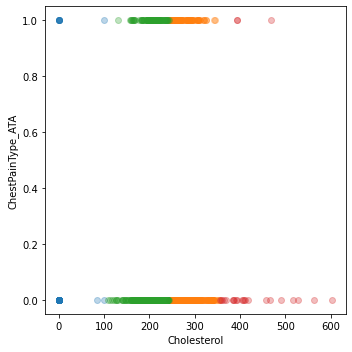

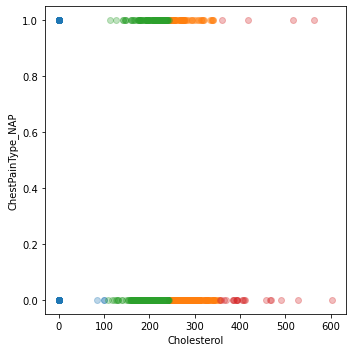

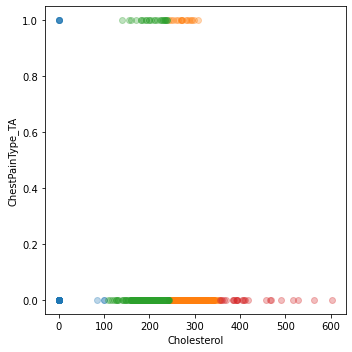

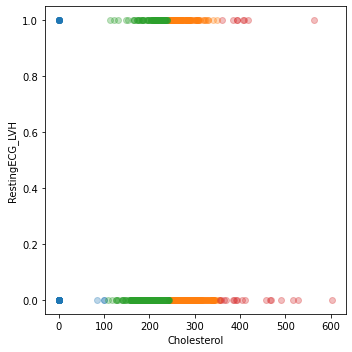

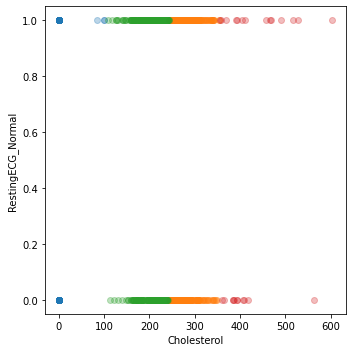

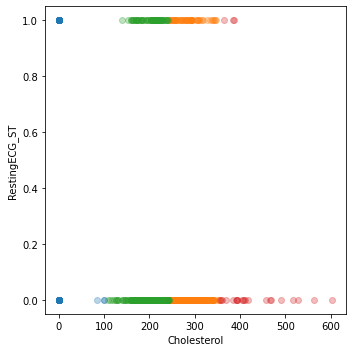

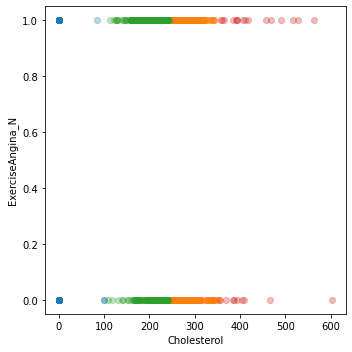

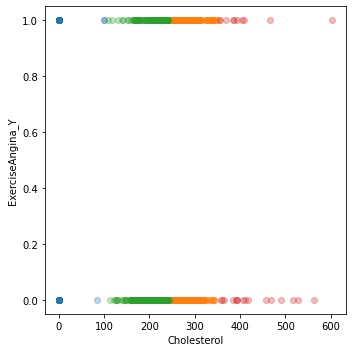

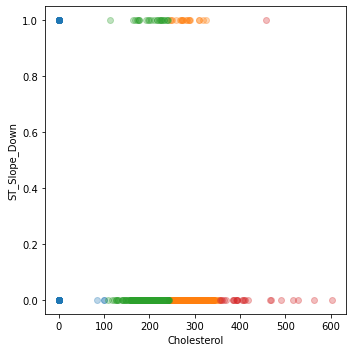

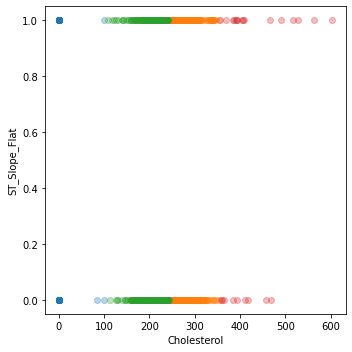

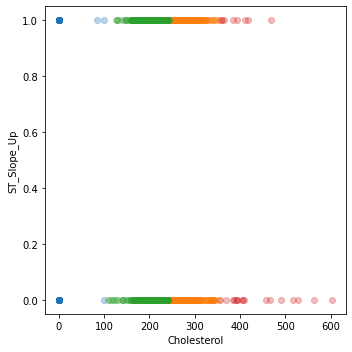

In [10]:
%matplotlib inline

keys = df.keys().drop('Cholesterol').values
import matplotlib.pyplot as plt
for y_value_key in keys:
    x_value_key = 'Cholesterol'
    plt.figure(figsize=(5,5))
    for k in range(4):
        plt.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
    plt.xlabel(x_value_key)
    plt.ylabel(y_value_key)
    plt.tight_layout()
    plt.show()

In [11]:
import numpy as np

feature = df.values
target = kmeans.predict(feature)

/home/minsuchae/.pyenv/versions/3.9.0/envs/tensorflow_gpu_2.7.0/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

train_feature, test_feature, train_target, test_target = train_test_split(feature,target,random_state=42, stratify=target)

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(train_feature,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
y_pred = clf.predict(test_feature)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target, y_pred,labels=[3,2,1,0]))

Accuracy : 0.9695652173913043
[[ 1  0  5  0]
 [ 0 98  1  0]
 [ 0  0 81  0]
 [ 0  1  0 43]]
